# Data Augmentation

Data augmentation occurs when you create new data baded on modification of your existing dara.In our case, our data will be images. Data augmentation on images would include transformation like:

* Flipping the images wither horizontally or vertically
* zomming in or out on the image
* Cropiing the image
* Varying the color on the image

In [6]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# plots images with labels within jupyter notebook
import numpy as np
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [3]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                        channel_shift_range=10, horizontal_flip=True)

In [4]:
image_path = 'cats-and-dogs/train/dog/dog.16.jpg'

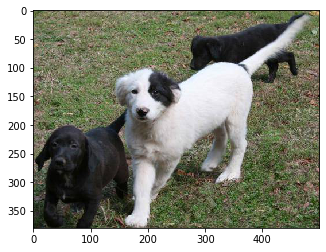

In [23]:
# Obtain image
image = np.expand_dims(imread(image_path),0)
plt.imshow(image[0])

In [24]:
# Generate natches of augmentated images from this image
aug_iter = gen.flow(image)

In [25]:
# get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

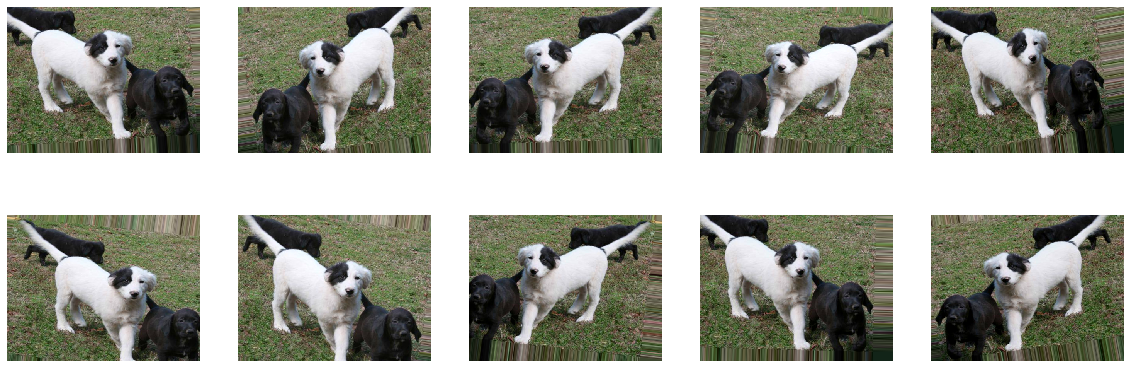

In [26]:
# Augmentated Images
plots(aug_images, figsize=(20,7), rows=2)